In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
import glob
import napari
import imageio
import numpy as np
from PIL import Image
from pathlib import Path
import re

In [2]:
plt.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 12  # Optional: Set the default font size
plt.rcParams['font.weight'] = 'normal'  # Optional: Set the default font weight


In [19]:
# # where the iamge and graphs data is kept
# glimpse_dir_1 = r'\\10.1.90.27\opera2\Nathan\macrohet_syno\results\june24\accurate_glimpse_matches'
# glimpse_dir_2 = r'\\10.1.90.27\opera2\Nathan\macrohet_syno\glimpses'
# # where to put the output
# output_dir =r'\\10.1.90.27\opera2\Nathan\macrohet_syno\results\mtb_origin'

# where the iamge and graphs data is kept
# glimpse_dir_1 = r'/mnt/SYNO/macrohet_syno/results/june24/*glimpse_matches/'
glimpse_dir = r'/mnt/SYNO/macrohet_syno/glimpses/'
graph_dir = r'/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/graphs_v2/'

# where to put the output
output_dir =r'/mnt/SYNO/macrohet_syno/results/mtb_origin/'

In [5]:
# load the df
# df = pd.read_pickle(r'\\10.1.90.27\opera2\Nathan\macrohet_syno\results/dfs/dt_df.pkl')
df = pd.read_pickle(r'/mnt/SYNO/macrohet_syno/results/dfs/dt_df.pkl')
df

,index,Acquisition ID,Biological Replicate,Cell ID,Compound,Concentration,Eccentricity,Experiment ID,Final Infection Status,Frame,...,Unique ID,dMphi Area (µm),dMtb Area (µm),dt,r2,x,y,doubling_times,dmtb_values,Strain/Compound
0,0,"(3, 4)",1,426,CTRL,EC0,0.929721,PS0000,0.0,0.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,457.172943,8.791715,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
1,1,"(3, 4)",1,426,CTRL,EC0,0.977788,PS0000,0.0,1.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,459.138947,6.718642,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
2,2,"(3, 4)",1,426,CTRL,EC0,0.733415,PS0000,0.0,2.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,460.555237,10.785886,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
3,3,"(3, 4)",1,426,CTRL,EC0,0.685354,PS0000,0.0,3.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,455.878815,11.143067,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
4,4,"(3, 4)",1,426,CTRL,EC0,0.727210,PS0000,0.0,4.0,...,426.3.4,-92.746118,-0.424621,7.0,0.944356,462.634186,14.050420,"[2.0, 3.0, 4.0, 9.0, 17.0]","[0.15, 0.31, 0.62, 1.23, 2.46]",RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315004,1797106,"(6, 12)",3,1874,BDQ,EC99,0.571813,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,227.093262,130.358139,[],[],RD1
1315005,1797107,"(6, 12)",3,1874,BDQ,EC99,0.373264,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,226.622925,130.532120,[],[],RD1
1315006,1797108,"(6, 12)",3,1874,BDQ,EC99,0.490623,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,225.366608,129.932709,[],[],RD1
1315007,1797109,"(6, 12)",3,1874,BDQ,EC99,0.693277,ND0003,1.0,NaN,...,1874.6.12,55.088959,1.095075,NaN,NaN,226.424683,128.489410,[],[],RD1


# Plotting the range of growers

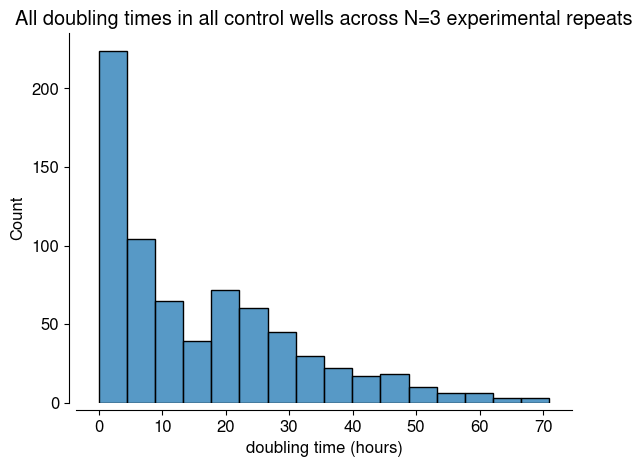

In [6]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'])

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'All doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
# plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

# Filtering for initially infected

22.57519946657587 15.0530841311941 15.048657400978822


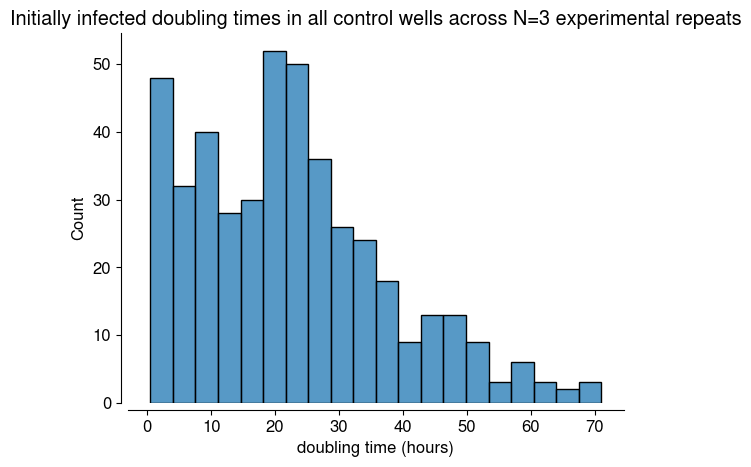

In [7]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==1.0]
subset_df = subset_df[(subset_df['Compound'] == 'CTRL') & (subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'], bins = 20)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Initially infected doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
# plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

# Calculate average and standard deviation
average_dt = subset_df['dt'].mean()
std_dev_dt = subset_df['dt'].std()

print(average_dt, std_dev_dt, average_dt-(std_dev_dt/2))

### defining the rapid grower threshold as the average minus 1/5 of the standard deviation

In [6]:
fast_grower_dt_threshold = 15

In [7]:
rapid_growers = subset_df[subset_df['dt'] < fast_grower_dt_threshold]

In [8]:
rapid_growers[['ID', 'dt', 'r2', 'Initial Infection Status']]

,ID,dt,r2,Initial Infection Status
13660,401.3.5.PS0000,6.2,0.969335,1.0
14484,438.3.5.PS0000,6.333333,0.891634,1.0
15082,337.3.5.PS0000,9.6,0.966637,1.0
18075,492.3.5.PS0000,13.6,0.8753,1.0
18523,474.3.5.PS0000,10.6,0.944315,1.0
...,...,...,...,...
856322,2643.4.4.ND0003,1.9,0.722061,1.0
856777,2690.4.4.ND0003,2.5,0.838742,1.0
857447,2769.4.4.ND0003,2.0,0.759235,1.0
862833,3652.4.4.ND0003,2.333333,0.936744,1.0


# Inspecting init uninfect control rapid growers

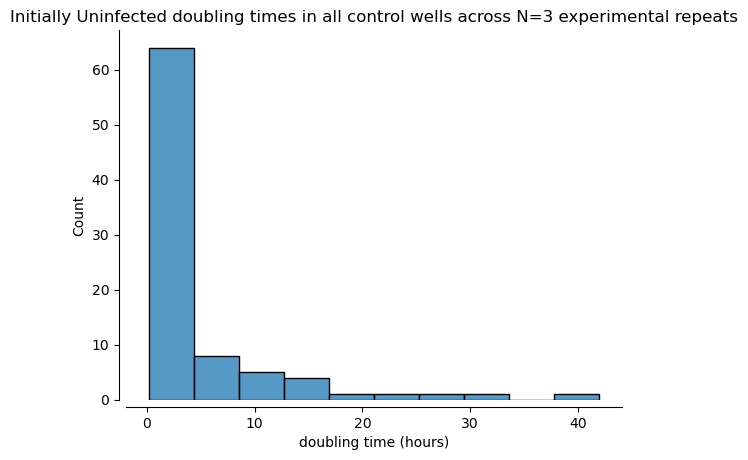

In [43]:
compound = 'BDQ'
conc = 'EC50'
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==0]
subset_df = subset_df[(subset_df['Compound'] == compound) & (subset_df['Strain'] == 'WT')]
subset_df = subset_df[(subset_df['Concentration'] == conc)]
sns.histplot(subset_df['dt'], bins = 10)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Initially Uninfected doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
# plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

In [44]:
rapid_growers = subset_df[subset_df['dt'] < fast_grower_dt_threshold]

In [45]:
rapid_growers[['ID', 'dt', 'r2', 'Initial Infection Status']]

,ID,dt,r2,Initial Infection Status
60418,406.3.9.PS0000,3.0,0.705665,0.0
60941,299.3.9.PS0000,2.6,0.703242,0.0
61090,301.3.9.PS0000,2.0,0.869352,0.0
65122,92.3.9.PS0000,2.0,0.873436,0.0
65869,36.3.9.PS0000,0.4,1.0,0.0
...,...,...,...,...
807330,1488.3.12.ND0003,12.75,0.956691,0.0
807415,1474.3.12.ND0003,0.25,0.971007,0.0
808836,1717.3.12.ND0003,1.25,0.780058,0.0
809377,1798.3.12.ND0003,0.625,1.0,0.0


### Defining a new column to record origin

In [46]:
rapid_growers['mtb_origin'] = 'Unknown'

/tmp/ipykernel_499913/241891740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rapid_growers['mtb_origin'] = 'Unknown'


In [7]:
rapid_growers = pd.read_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_rapid_growers.csv')

NameError: name 'conc' is not defined

In [47]:
for N, (row, data) in tqdm(enumerate(rapid_growers.iterrows()), total=len(rapid_growers)):
    # # use enumerateion to skip already processed
    # if N < 24:
    #     continue
    
    mp4_files = glob.glob(os.path.join(glimpse_dir, f'{data.ID}.mp4'))
    graph_files = glob.glob(os.path.join(graph_dir, f'*cell_ID.{data.ID}*.png'))
    
    if mp4_files:
        mp4_fn = mp4_files[0]
        if graph_files:
            graph_fn = graph_files[0]
            
            # Load the mp4 and png files
            video = imageio.get_reader(mp4_fn, 'ffmpeg')
            img = imageio.imread(graph_fn)
            
            # Display in napari
            viewer = napari.Viewer()
            
            # Load video frames into a numpy array
            video_frames = np.array([frame for frame in video])
            
            # Resize the image to have the same height as the video
            video_height = video_frames.shape[1]
            img_resized = np.array(Image.fromarray(img).resize((int(img.shape[1] * (video_height / img.shape[0])), video_height)))
            
            # Add video and image to napari viewer
            viewer.add_image(video_frames, name=f'{data.ID} Video', blending='additive')
            viewer.add_image(img_resized, name=f'{data.ID} Image')
            viewer.grid.enabled = True
            viewer.dims.current_step = (0, 374, 374)
            
            # Define key binding functions
            def mark_transfer(viewer):
                rapid_growers.at[row, 'mtb_origin'] = 'Transfer'
                rapid_growers.to_csv(Path(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_rapid_growers.csv'), index=False)
                print(f"ID {data.ID} marked as 'transfer' and DataFrame saved.")
            
            def mark_uptake(viewer):
                rapid_growers.at[row, 'mtb_origin'] = 'Uptake'
                rapid_growers.to_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_rapid_growers.csv', index=False)
                print(f"ID {data.ID} marked as 'uptake' and DataFrame saved.")
            
            def junk(viewer):
                rapid_growers.at[row, 'mtb_origin'] = 'Junk'
                rapid_growers.to_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_rapid_growers.csv', index=False)
                print(f"ID {data.ID} marked as 'junk' and DataFrame saved.")
            
            # Add key bindings
            viewer.bind_key('t', mark_transfer)
            viewer.bind_key('u', mark_uptake)
            viewer.bind_key('j', junk)
            viewer.show(block=True)

  0%|          | 0/80 [00:00<?, ?it/s]

/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 406.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 299.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 301.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 92.3.9.PS0000 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 36.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 265.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 264.3.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 204.3.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 647.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 608.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 725.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 767.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 687.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 819.3.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 425.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 474.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 402.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 323.4.9.PS0000 marked as 'transfer' and DataFrame saved.
ID 323.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 375.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 595.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 582.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 615.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 109.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 37.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 12.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 44.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 49.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 265.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 305.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 313.4.9.PS0000 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 193.4.9.PS0000 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 745.4.9.PS0000 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 44.3.11.ND0002 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 761.3.11.ND0002 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 491.3.12.ND0002 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 394.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 401.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 93.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 717.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 950.3.11.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1413.3.11.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1581.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1782.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1984.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2018.3.11.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2204.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2254.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2386.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2472.3.11.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2734.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 2816.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 3008.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 3412.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 3571.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 3627.3.11.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 3641.3.11.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 177.3.12.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 158.3.12.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 210.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 13.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 19.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 132.3.12.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 133.3.12.ND0003 marked as 'uptake' and DataFrame saved.
ID 133.3.12.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 420.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 504.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 572.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 592.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 636.3.12.ND0003 marked as 'junk' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 696.3.12.ND0003 marked as 'transfer' and DataFrame saved.
ID 696.3.12.ND0003 marked as 'transfer' and DataFrame saved.
ID 696.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 722.3.12.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 938.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 971.3.12.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1355.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1488.3.12.ND0003 marked as 'uptake' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1474.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1717.3.12.ND0003 marked as 'transfer' and DataFrame saved.


/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)
/tmp/ipykernel_499913/1795333362.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)


ID 1826.3.12.ND0003 marked as 'junk' and DataFrame saved.


## Plot

In [7]:
csv_fns = glob.glob(f'{output_dir}/wt_*EC*_init_uninf_updated_rapid_growers.csv')

In [8]:
dfs = [pd.read_csv(fn) for fn in csv_fns]

df = pd.concat(dfs, ignore_index=True)

In [10]:
del_cols = ['dts_0', 'dts_1', 'dts_2', 'dts_3', 'dts_4',
       'dmtb_0', 'dmtb_1', 'dmtb_2', 'dmtb_3', 'dmtb_4', 'dt_0', 'dt_1',
       'dt_2', 'dt_3', 'dt_4', 'dt_5', 'dt_6', 'dmtb_5', 'dmtb_6', 'dt_7',
       'dmtb_7', 'dt_8', 'dmtb_8', 'dt_9', 'dmtb_9', 'dt_10', 'dt_11',
       'dmtb_10', 'dmtb_11', 'index', 'dts',	'dt_dmtb',	'dmtb']
df.drop(columns=del_cols, inplace= True)

In [13]:
df['mtb_origin'].value_counts()

Junk        302
Uptake      271
Transfer    172
Unknown      46
Name: mtb_origin, dtype: int64

### A graph to show doubling time versus mtb_origin

In [80]:
len(df)

791

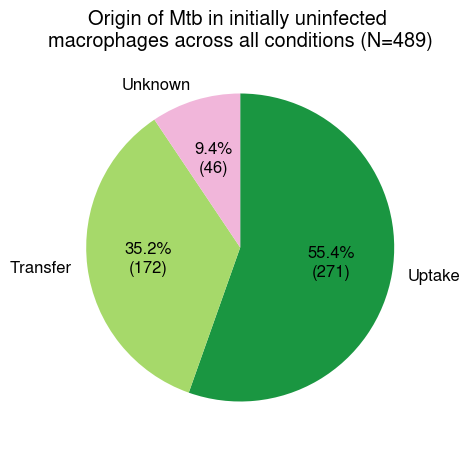

In [99]:
# Count the occurrences of each unique value in the 'mtb_origin' column excluding 'Junk'
mtb_origin_counts = df[df['mtb_origin'] != 'Junk']['mtb_origin'].value_counts()

# Colors from expanded_piyg
colors = ['#1a9641', '#a6d96a', '#f1b6da', '#d02c91']

# Calculate the total number
total = mtb_origin_counts.sum()

# Function to add counts to pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return f"{pct:.1f}%\n({absolute:d})"

# Plot the pie chart
plt.figure(figsize=(5,5))
mtb_origin_counts.plot.pie(
    autopct=lambda pct: func(pct, mtb_origin_counts), 
    startangle=90, 
    counterclock=False, 
    colors=colors
)

# Set title with total number
title = f'Origin of Mtb in initially uninfected \nmacrophages across all conditions (N={total})'
plt.title(title, )
plt.ylabel('')  # Hide the y-label

# Save the figure with filename based on the title
output_fn = title.replace(' ', '_') + '.pdf'
output_path = os.path.join(output_dir, 'graphs', output_fn)
plt.savefig(output_path, bbox_inches='tight', dpi=314)

# Display the pie chart
plt.show()

In [211]:
mtb_origin_counts

Uptake      25
Transfer    10
Unknown      2
Name: mtb_origin, dtype: int64

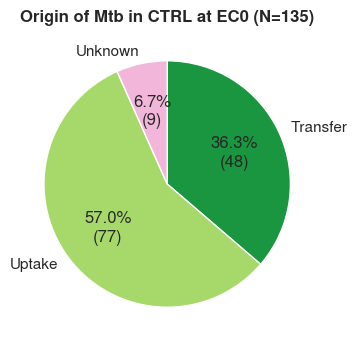

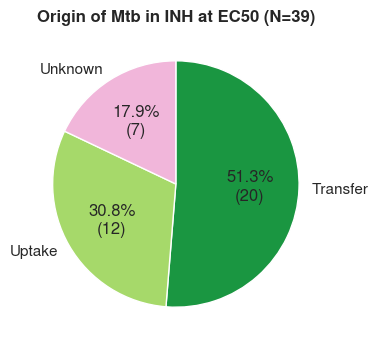

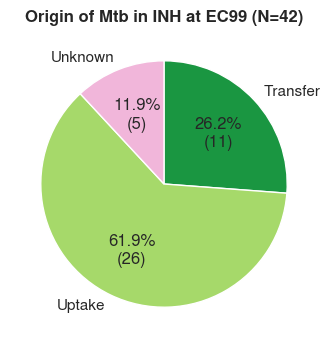

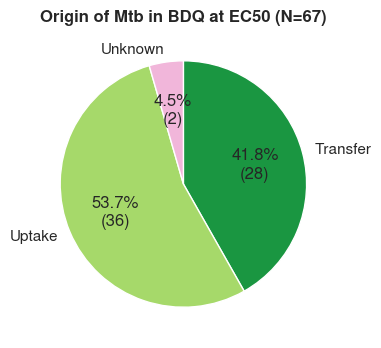

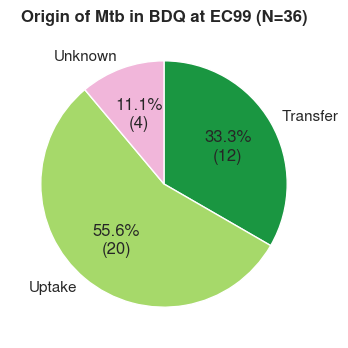

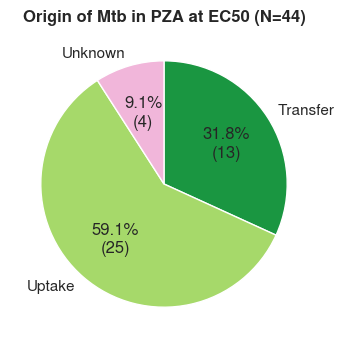

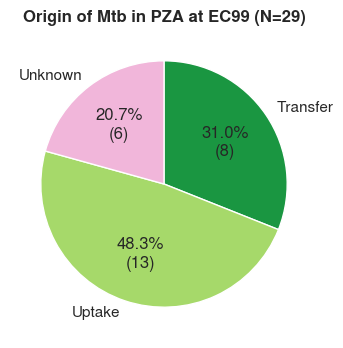

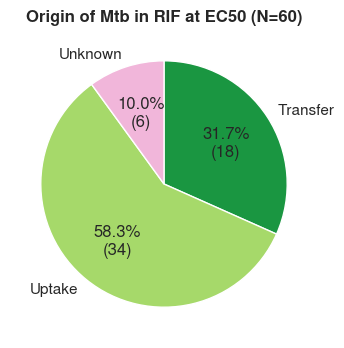

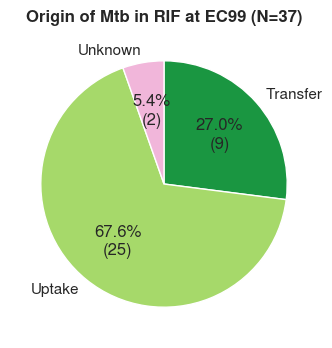

In [215]:
mtb_origin_order = ['Transfer', 'Uptake', 'Unknown']  # Adjust this list based on actual categories

# Colors from expanded_piyg
colors = ['#1a9641', '#a6d96a', '#f1b6da', '#d02c91']

# Group by 'Compound' and 'Concentration'
grouped = df.groupby(['Compound', 'Concentration'])

# Function to add counts to pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return f"{pct:.1f}%\n({absolute:d})"

# Iterate over each group
for (compound, concentration), group in grouped:
    # Filter out 'Junk'
    filtered_group = group[group['mtb_origin'] != 'Junk']

    # Count the occurrences of each unique value in the 'mtb_origin' column
    mtb_origin_counts = filtered_group['mtb_origin'].value_counts()

    # Reindex to ensure consistent order
    mtb_origin_counts = mtb_origin_counts.reindex(mtb_origin_order, fill_value=0)

    # Calculate the total number
    total = mtb_origin_counts.sum()

    # Plot the pie chart
    plt.figure(figsize=(4, 4))
    mtb_origin_counts.plot.pie(
        autopct=lambda pct: func(pct, mtb_origin_counts), 
        startangle=90, 
        counterclock=False, 
        colors=colors
    )

    # Set title with total number and font weight
    title = f'Origin of Mtb in {compound} at {concentration} (N={total})'
    plt.title(title, fontweight='bold')
    plt.ylabel('')  # Hide the y-label

    # Save the figure with filename based on the title
    output_fn = title.replace(' ', '_') + '.pdf'
    output_path = os.path.join(output_dir, 'graphs', output_fn)  # Adjust 'output_dir' to your actual output directory
    plt.savefig(output_path, bbox_inches='tight', dpi=314)

    # Display the pie chart
    plt.show()

/tmp/ipykernel_499913/1052223192.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (compound), group in grouped:


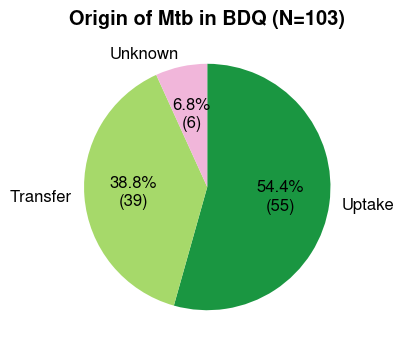

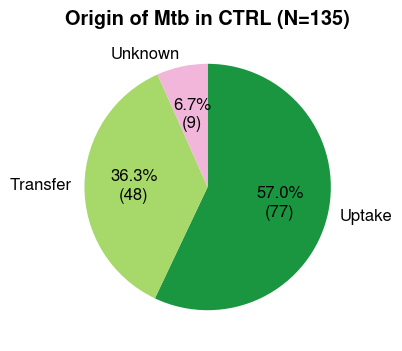

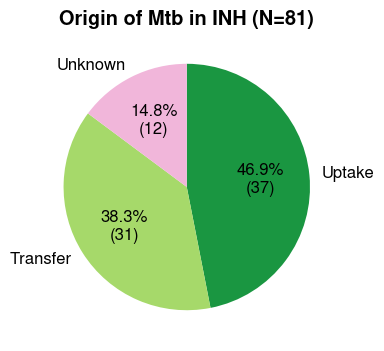

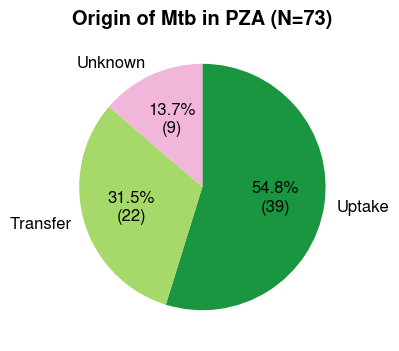

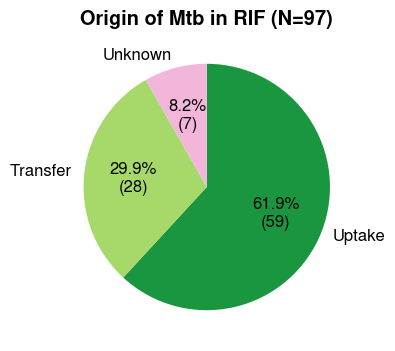

In [104]:

# Colors from expanded_piyg
colors = ['#1a9641', '#a6d96a', '#f1b6da', '#d02c91']

# Group by 'Compound' and 'Concentration'
grouped = df.groupby(['Compound'])

# Iterate over each group
for (compound), group in grouped:
    # Filter out 'Junk'
    filtered_group = group[group['mtb_origin'] != 'Junk']

    # Count the occurrences of each unique value in the 'mtb_origin' column
    mtb_origin_counts = filtered_group['mtb_origin'].value_counts()

    # Calculate the total number
    total = mtb_origin_counts.sum()

    # Plot the pie chart
    plt.figure(figsize=(4, 4))
    mtb_origin_counts.plot.pie(
        autopct=lambda pct: func(pct, mtb_origin_counts), 
        startangle=90, 
        counterclock=False, 
        colors=colors
    )

    # Set title with total number and font weight
    title = f'Origin of Mtb in {compound} (N={total})'
    plt.title(title, fontweight='bold')
    plt.ylabel('')  # Hide the y-label

    # Save the figure with filename based on the title
    output_fn = title.replace(' ', '_') + '.pdf'
    output_path = os.path.join(output_dir, 'graphs', output_fn)
    plt.savefig(output_path, bbox_inches='tight', dpi=314)

    # Display the pie chart
    plt.show()

# Function to add counts to pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return f"{pct:.1f}%\n({absolute:d})"

In [36]:
filtered_group

,Acquisition ID,Biological Replicate,Cell ID,Compound,Concentration,Eccentricity,Experiment ID,Final Infection Status,Frame,GFP,...,dMphi Area (µm),dMtb Area (µm),dt,r2,x,y,doubling_times,dmtb_values,Strain/Compound,mtb_origin
312,"(3, 7)",1,412,RIF,EC50,0.289206,PS0000,1.0,0.0,3157.904785,...,497.677902,26.103004,2.400000,0.949685,38.172123,49.955482,"[1.0, 1.0, 1.0, 3.0, 6.0]","[0.41, 0.83, 1.65, 3.31, 6.62]",RIF,Uptake
313,"(3, 7)",1,340,RIF,EC50,0.878054,PS0000,1.0,0.0,2623.529541,...,447.885529,5.631812,1.428571,0.944505,625.614807,169.527756,"[1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 6.0]","[0.03, 0.05, 0.1, 0.2, 0.41, 0.82, 1.63]",RIF,Uptake
314,"(3, 7)",1,342,RIF,EC50,0.849776,PS0000,1.0,0.0,2965.360596,...,369.509472,18.683314,0.400000,0.897484,828.180420,162.873917,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.01, 0.02, 0.04, 0.08, 0.16, 0.31,...",RIF,Uptake
317,"(3, 7)",1,628,RIF,EC50,0.337387,PS0000,1.0,0.0,2507.022461,...,649.267521,10.548474,7.000000,1.000000,159.149155,448.957550,"[0.0, 14.0]","[5.9, 11.8]",RIF,Uptake
318,"(3, 7)",1,551,RIF,EC50,0.830013,PS0000,1.0,0.0,2047.436523,...,333.327312,77.191588,1.791667,0.883790,18.038614,611.073181,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.01, 0.02, 0.04, 0.07, 0.15, ...",RIF,Uptake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,"(4, 8)",3,422,RIF,EC99,0.811882,ND0003,1.0,1.0,733.584900,...,442.544246,31.533680,5.000000,0.957786,950.529602,1194.105469,[5.0],[10.43],RIF,Transfer
582,"(4, 8)",3,756,RIF,EC99,0.813290,ND0003,0.0,8.0,1570.395020,...,-326.935652,0.000000,0.166667,0.992698,802.157654,707.235107,"[0.0, 0.5, 0.0]","[0.11, 0.22, 0.45]",RIF,Uptake
583,"(4, 8)",3,920,RIF,EC99,0.409101,ND0003,1.0,11.0,646.139893,...,405.043527,0.223485,1.714286,0.844419,767.081116,92.524246,"[0.5, 0.0, 0.5, 0.5, 1.5, 2.5, 6.5]","[0.01, 0.02, 0.04, 0.07, 0.15, 0.29, 0.59]",RIF,Uptake
584,"(4, 8)",3,1098,RIF,EC99,0.439927,ND0003,1.0,15.0,1528.393433,...,503.846078,17.565891,5.083333,0.856888,819.563599,383.729065,"[1.5, 1.0, 1.5, 2.0, 4.0, 20.5]","[0.14, 0.27, 0.54, 1.08, 2.17, 4.34]",RIF,Uptake


In [84]:
# Colors from expanded_piyg
colors = ['#1a9641', '#a6d96a', '#f1b6da', '#d02c91']

# Group by 'Compound' and 'Concentration'
grouped = df.groupby(['Compound', 'Concentration'])

# Create a dictionary to store counts for each compound
compound_counts = []

for (compound, concentration), group in grouped:
    # Filter out 'Junk'
    filtered_group = group[group['mtb_origin'] != 'Junk']

    # Count the occurrences of each unique value in the 'mtb_origin' column
    mtb_origin_counts = filtered_group['mtb_origin'].value_counts()

    mtb_origin_counts['Concentration'] = concentration
    mtb_origin_counts['Compound'] = compound
    
    # Store the counts in the dictionary
    compound_counts.append(mtb_origin_counts)

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(compound_counts, index=range(9))


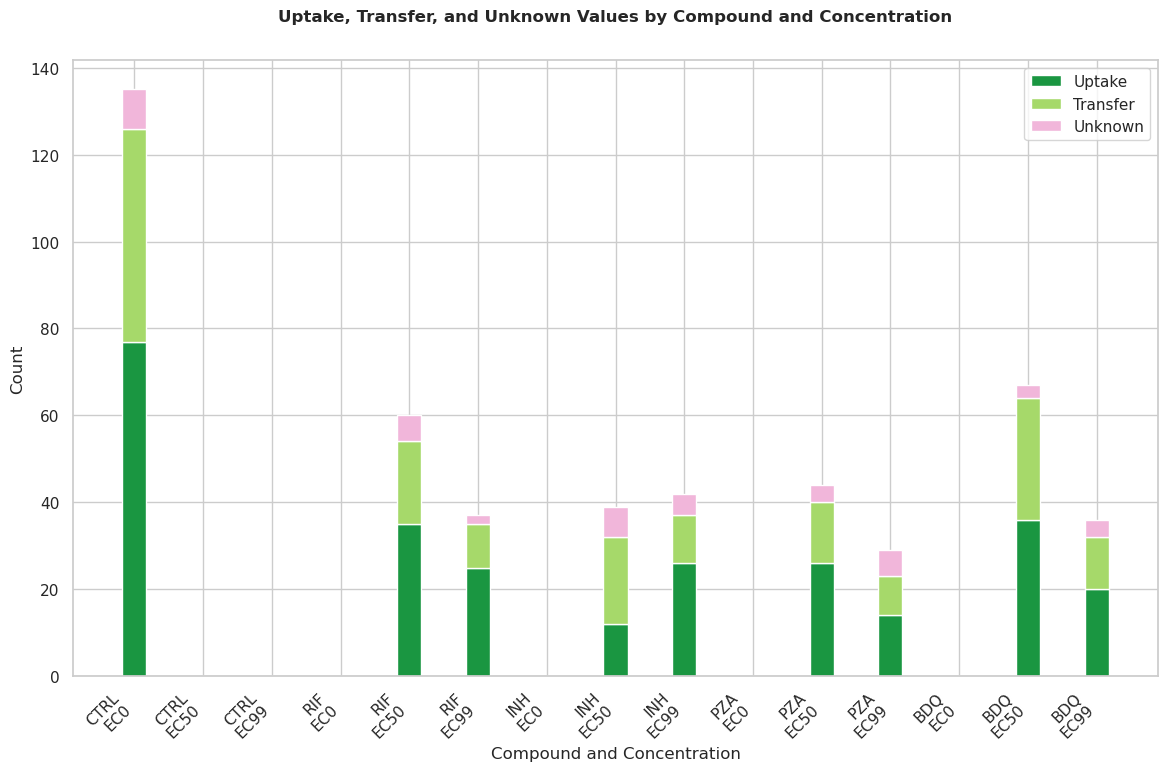

In [109]:

# Order the compounds and create a custom sort key
compound_order = ['CTRL', 'RIF', 'INH', 'PZA', 'BDQ']
combined_df['Compound'] = pd.Categorical(combined_df['Compound'], categories=compound_order, ordered=True)

# Filter the dataframe to remove inappropriate combinations
combined_df = combined_df[~((combined_df['Compound'] != 'CTRL') & (combined_df['Concentration'] == 'EC0'))]
combined_df = combined_df[~((combined_df['Compound'] == 'CTRL') & (combined_df['Concentration'] != 'EC0'))]

# Sort the dataframe
combined_df = combined_df.sort_values(['Compound', 'Concentration'])

# Create a pivot table for plotting
pivot_df = combined_df.pivot_table(
    index=['Compound', 'Concentration'],
    values=['Uptake', 'Transfer', 'Unknown'],
    aggfunc='sum'
).reset_index()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
positions = np.arange(len(pivot_df))

# Plot bars
bottoms = np.zeros(len(pivot_df))
for i, category in enumerate(['Uptake', 'Transfer', 'Unknown']):
    ax.bar(positions, pivot_df[category], width=bar_width, bottom=bottoms, label=category, color=colors[i])
    bottoms += pivot_df[category]

# Set the x-ticks and x-tick labels
ax.set_xticks(positions)
ax.set_xticklabels([f"{compound}\n{conc}" for compound, conc in zip(pivot_df['Compound'], pivot_df['Concentration'])], rotation=45, ha='right')

# Set title and labels
ax.set_title('Uptake, Transfer, and Unknown Values by Compound and Concentration', fontweight='bold', y=1.05)
ax.set_xlabel('Compound and Concentration')
ax.set_ylabel('Count')

# Add legend
ax.legend()

# Save the figure
output_path = os.path.join(output_dir, 'graphs', 'stacked_histogram_ordered.pdf')
plt.savefig(output_path, bbox_inches='tight', dpi=314)

# Display the plot
plt.show()

In [115]:
combined_df[['CTRL', 'BDQ', 'RIF', 'INH', 'PZA']]

,CTRL,BDQ,RIF,INH,PZA
Uptake,77,56,60,38,40
Transfer,49,40,29,31,23
Unknown,9,7,8,12,10


/tmp/ipykernel_8473/67815024.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (compound), group in grouped:


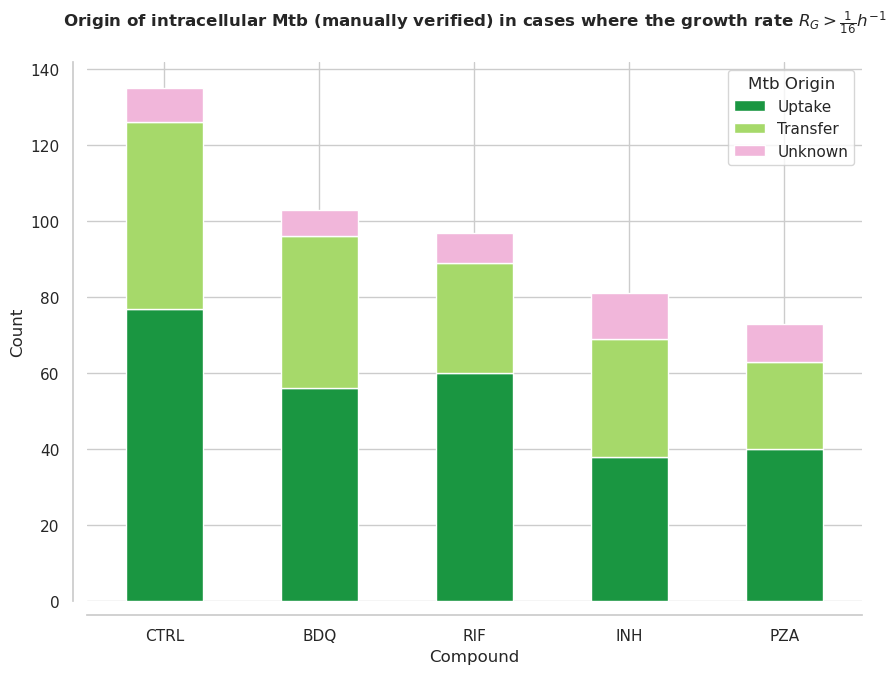

In [116]:
# Colors fr`om expanded_piyg
colors = ['#1a9641', '#a6d96a', '#f1b6da', '#d02c91']

# Group by 'Compound' and 'Concentration'
grouped = df.groupby(['Compound'])

# Create a dictionary to store counts for each compound
compound_counts = {}

for (compound), group in grouped:
    # Filter out 'Junk'
    filtered_group = group[group['mtb_origin'] != 'Junk']

    # Count the occurrences of each unique value in the 'mtb_origin' column
    mtb_origin_counts = filtered_group['mtb_origin'].value_counts()
    
    # Store the counts in the dictionary
    compound_counts[compound] = mtb_origin_counts

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(compound_counts).fillna(0)

# Plot the stacked bar chart
combined_df[['CTRL', 'BDQ', 'RIF', 'INH', 'PZA']].T.plot(kind='bar', stacked=True, color=colors, figsize=(10, 7))

# Set title and labels
plt.title(r'Origin of intracellular Mtb (manually verified) in cases where the growth rate $R_{G}> \frac{1}{16}h^{-1}$', fontweight='bold', y=1.05)
plt.xlabel('Compound')
plt.ylabel('Count')

# Add legend
plt.legend(title='Mtb Origin')


sns.despine(offset = 10)
# Save the figure
output_path = os.path.join(output_dir, 'graphs', 'combined_mtb_origin_graph.pdf')
plt.savefig(output_path, bbox_inches='tight', dpi=314)

# Display the plot
plt.show()


## Inspecting doubling times 

In [171]:
from macrohet import colours

In [192]:
df = df[df['mtb_origin'] != 'Junk']

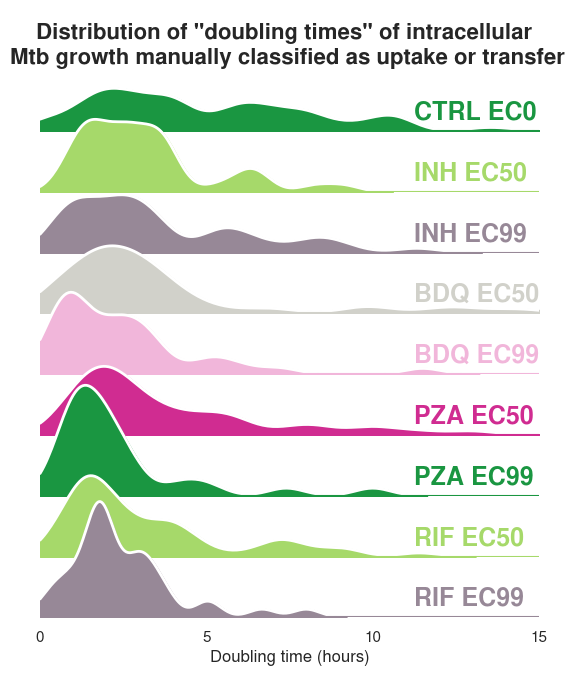

In [217]:

# Define the desired order for concentration
concentration_order = {'EC0': 0, 'EC50': 1, 'EC99': 2}

# Ensure that the compound 'CTRL' appears first and the rest are sorted alphabetically
compound_order = ['CTRL', 'INH'] + sorted([comp for comp in df['Compound'].unique() if comp not in ['CTRL', 'INH']])

# Create a numeric column for sorting based on concentration order
df['ConcentrationOrder'] = df['Concentration'].map(concentration_order)

# Create a categorical type for Compound with the specified order
df['Compound'] = pd.Categorical(df['Compound'], categories=compound_order, ordered=True)

# Sort the DataFrame by Compound and ConcentrationOrder in descending order
df = df.sort_values(by=['Compound', 'ConcentrationOrder'],)# ascending=[False, False])

# Combine Compound and Concentration for the hue
df['Compound_Concentration'] = df['Compound'].astype(str) + ' ' + df['Concentration']

# Create a custom PiYG palette excluding the very light colors
custom_piyg_palette = colours.expanded_piyg

# Initialize the FacetGrid object with increased height
pal = sns.color_palette(custom_piyg_palette, len(df['Compound_Concentration'].unique()))
g = sns.FacetGrid(df, row="Compound_Concentration", hue="Compound_Concentration", aspect=8, height=0.75, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "dt",
      bw_adjust=.5, clip=(0, 16),
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dt", clip=(0, 16), color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1.5, linestyle="-", color=None, clip_on=(0,15))

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.75, .15, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=18)

g.map(label, "dt")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim = (0,15))
g.set(xticks=[0,5,10, 15], xlabel="Doubling time (hours)")
g.despine(bottom=True, left=True)


# Add a title to the plot
title = 'Distribution of "doubling times" of intracellular \nMtb growth manually classified as uptake or transfer'
plt.suptitle(title, y=0.93, x=.55, fontsize=16, fontweight = 'bold')

# Adjust the margins to prevent text cropping
plt.subplots_adjust(top=0.95, bottom=0.05)


output_fn = title.replace(' ', '_').replace('\n','') + '.pdf'
output_path = os.path.join(output_dir, 'graphs', output_fn)
plt.savefig(output_path, bbox_inches='tight', dpi=314)


# Show the plot
plt.show()

### Now combine with all 

In [219]:
df_all = pd.read_pickle('/mnt/SYNO/macrohet_syno/results/dfs/dt_df.pkl')

In [221]:
df_all.drop_duplicates('ID', inplace=True)

In [225]:
df_all = df_all[df_all['dt'] > 16]

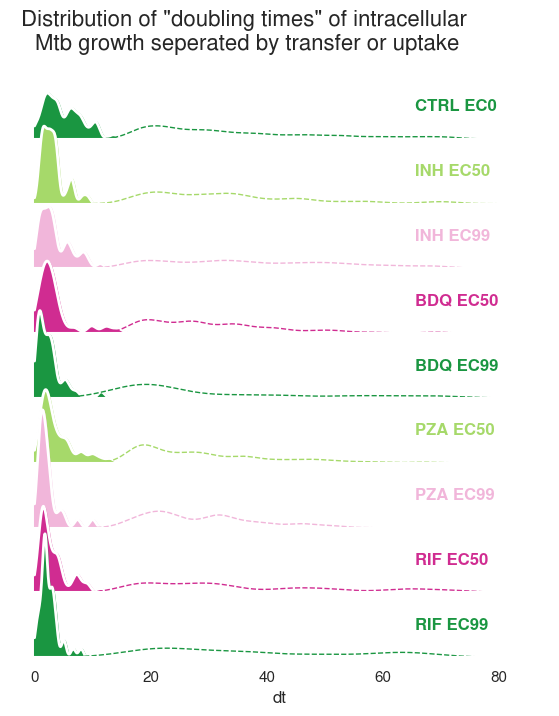

In [245]:
# Define the desired order for concentration
concentration_order = {'EC0': 0, 'EC50': 1, 'EC99': 2}

# Ensure that the compound 'CTRL' and 'INH' appear first and the rest are sorted alphabetically
compound_order = ['CTRL', 'INH'] + sorted([comp for comp in df['Compound'].unique() if comp not in ['CTRL', 'INH']])

# Create a numeric column for sorting based on concentration order
df['ConcentrationOrder'] = df['Concentration'].map(concentration_order)

# Create a categorical type for Compound with the specified order
df['Compound'] = pd.Categorical(df['Compound'], categories=compound_order, ordered=True)

# Sort the DataFrame by Compound and ConcentrationOrder
df = df.sort_values(by=['Compound', 'ConcentrationOrder'])

# Combine Compound and Concentration for the hue
df['Compound_Concentration'] = df['Compound'].astype(str) + ' ' + df['Concentration']

# Create a custom PiYG palette excluding the very light colors
custom_piyg_palette = colors

# Initialize the FacetGrid object with increased height
pal = sns.color_palette(custom_piyg_palette, len(df['Compound_Concentration'].unique()))
g = sns.FacetGrid(df, row="Compound_Concentration", hue="Compound_Concentration", aspect=8, height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "dt",
      bw_adjust=.5, clip=(0, None),
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dt", clip=(0, 16), color="w", lw=2, bw_adjust=.5)

# Overlay the KDE line plot for df_all
def overlay_kde(data, color, **kwargs):
    compound = data['Compound'].iloc[0]
    concentration = data['Concentration'].iloc[0]
    sns.kdeplot(
        data=df_all[(df_all['Compound'] == compound) & (df_all['Concentration'] == concentration)], 
        x="dt", color=color, ls = 'dashed', lw=1, bw_adjust=.5, ax=plt.gca(), clip=(0, None)
    )

g.map_dataframe(overlay_kde)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1.5, linestyle="-", color="w", clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.75, .25, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=12)  # Increase fontsize here

g.map(label, "dt")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.set(xlim=(0, 15))
# g.set(xticks=[0, 5, 10, 15], xlabel="Doubling time (hours)")
g.despine(bottom=True, left=True)

# Add a title to the plot
title = 'Distribution of "doubling times" of intracellular \nMtb growth seperated by transfer or uptake'
plt.suptitle(title, y=0.95, fontsize=16)

# Adjust the margins to prevent text cropping
plt.subplots_adjust(top=0.95, bottom=0.05)

# Save the plot with a filename derived from the title
output_fn = re.sub(r'[\s\n]+', '_', title) + '.pdf'
plt.savefig(output_fn, bbox_inches='tight', dpi=314)

# Show the plot
plt.show()

# Inspecting the medium fastest growers ( 14 < dt < 24)

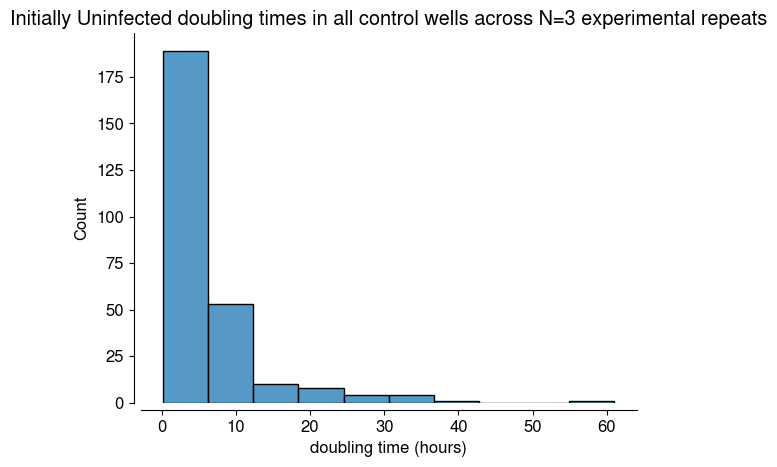

In [13]:
compound = 'CTRL'
conc = 'EC0'
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==0]
subset_df = subset_df[(subset_df['Compound'] == compound) & (subset_df['Strain'] == 'WT')]
subset_df = subset_df[(subset_df['Concentration'] == conc)]
sns.histplot(subset_df['dt'], bins = 10)

plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'Initially Uninfected doubling times in all control wells across N=3 experimental repeats'
plt.title(title)
fn = f"{title.replace(' ', '_')}.png"
# plt.savefig(os.path.join(output_dir, fn), dpi = 314, bbox_inches = 'tight')

In [16]:
medium_rapid_growers = subset_df[(subset_df['dt'] >= 14) & (subset_df['dt'] <= 24)]


In [17]:
medium_rapid_growers[['ID', 'dt', 'r2', 'Initial Infection Status']]

,ID,dt,r2,Initial Infection Status
19791,513.3.5.PS0000,18.5,0.861865,0.0
25323,665.3.5.PS0000,18.666667,0.992676,0.0
25904,840.3.5.PS0000,24.0,0.947325,0.0
85490,480.4.5.PS0000,18.333333,0.973262,0.0
85715,474.4.5.PS0000,17.666667,0.992858,0.0
87288,348.4.5.PS0000,17.0,1.0,0.0
165151,647.5.5.PS0000,22.666667,0.727902,0.0
165969,515.5.5.PS0000,20.5,0.977696,0.0
232293,465.6.5.PS0000,14.0,0.986919,0.0
234541,356.6.5.PS0000,14.25,0.718113,0.0


### Defining a new column to record origin

In [18]:
medium_rapid_growers['mtb_origin'] = 'Unknown'

/tmp/ipykernel_11674/2951765026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_rapid_growers['mtb_origin'] = 'Unknown'


In [7]:
medium_rapid_growers = pd.read_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_medium_rapid_growers.csv')

NameError: name 'conc' is not defined

In [ ]:
for N, (row, data) in tqdm(enumerate(medium_rapid_growers.iterrows()), total=len(medium_rapid_growers)):
    # # use enumerateion to skip already processed
    # if N < 24:
    #     continue
    
    mp4_files = glob.glob(os.path.join(glimpse_dir, f'{data.ID}.mp4'))
    graph_files = glob.glob(os.path.join(graph_dir, f'*cell_ID.{data.ID}*.png'))
    
    if mp4_files:
        mp4_fn = mp4_files[0]
        if graph_files:
            graph_fn = graph_files[0]
            
            # Load the mp4 and png files
            video = imageio.get_reader(mp4_fn, 'ffmpeg')
            img = imageio.imread(graph_fn)
            
            # Display in napari
            viewer = napari.Viewer()
            
            # Load video frames into a numpy array
            video_frames = np.array([frame for frame in video])
            
            # Resize the image to have the same height as the video
            video_height = video_frames.shape[1]
            img_resized = np.array(Image.fromarray(img).resize((int(img.shape[1] * (video_height / img.shape[0])), video_height)))
            
            # Add video and image to napari viewer
            viewer.add_image(video_frames, name=f'{data.ID} Video', blending='additive')
            viewer.add_image(img_resized, name=f'{data.ID} Image')
            viewer.grid.enabled = True
            viewer.dims.current_step = (0, 374, 374)
            
            # Define key binding functions
            def mark_transfer(viewer):
                medium_rapid_growers.at[row, 'mtb_origin'] = 'Transfer'
                medium_rapid_growers.to_csv(Path(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_medium_rapid_growers.csv'), index=False)
                print(f"ID {data.ID} marked as 'transfer' and DataFrame saved.")
            
            def mark_uptake(viewer):
                medium_rapid_growers.at[row, 'mtb_origin'] = 'Uptake'
                medium_rapid_growers.to_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_medium_rapid_growers.csv', index=False)
                print(f"ID {data.ID} marked as 'uptake' and DataFrame saved.")
            
            def junk(viewer):
                medium_rapid_growers.at[row, 'mtb_origin'] = 'Junk'
                medium_rapid_growers.to_csv(f'{output_dir}/wt_{compound}_{conc}_init_uninf_updated_medium_rapid_growers.csv', index=False)
                print(f"ID {data.ID} marked as 'junk' and DataFrame saved.")
            
            # Add key bindings
            viewer.bind_key('t', mark_transfer)
            viewer.bind_key('u', mark_uptake)
            viewer.bind_key('j', junk)
            viewer.show(block=True)

  0%|          | 0/15 [00:00<?, ?it/s]

/tmp/ipykernel_11674/4033760400.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(graph_fn)
